In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [3]:
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt

import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

In [4]:
rnd.random_state(np.random.RandomState(seed=42), force=True);

In [5]:
W = proc.WienerProcess.create_2d(mean1=.25, mean2=.5, sd1=3., sd2=4., cor=-1.)
em = sim.EulerMaruyama(process=W)

In [6]:
df = sim.run(em, 100)

In [7]:
isinstance(W, proc.MarkovProcess)

True

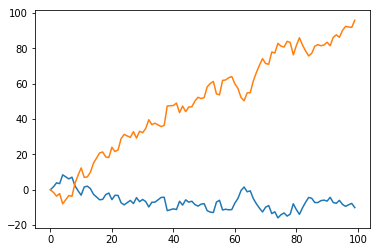

In [8]:
plt.plot(df);

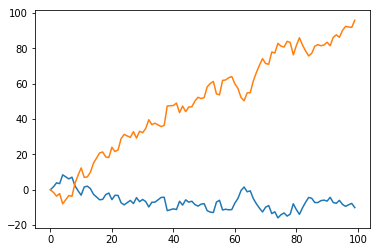

In [9]:
rnd.random_state(np.random.RandomState(seed=42), force=True);
x = [0., 0.]
ts = [0.]; xs = [x]
for t, v in zip(sim.xtimes(1., 100., 1.), rnd.multivariate_normals(ndim=2)):
    x = W.propagate(max(0, t-1), x, t, v)
    ts.append(t); xs.append(x.flatten())
plt.plot(ts, xs);

In [10]:
df[0:10]

,0,1
0.0,0.000000,0.000000
1.0,1.740142,-1.486857
2.0,3.933208,-3.577611
3.0,3.480748,-2.140997
4.0,8.468386,-7.957849
5.0,7.309963,-5.579951
6.0,6.169710,-3.226280
7.0,7.145597,-3.694129
8.0,2.220843,3.705542
9.0,-0.567650,8.256867


In [11]:
next(em)

(100.0, array([[-9.66927644],
        [96.22570192]]))

In [12]:
ts, vs = [], []
for t, v in em:
    ts.append(t); vs.append(v)
    if t == 110: break
ts, vs

([101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0],
 [array([[-8.34591436],
         [95.29455247]]), array([[-4.84676063],
         [91.4623475 ]]), array([[-8.72976873],
         [97.47302497]]), array([[-6.93466293],
         [95.9128839 ]]), array([[-5.13951987],
         [94.35269316]]), array([[-3.17684834],
         [92.56913112]]), array([[-6.48430467e-02],
         [ 8.92531241e+01]]), array([[-0.76065078],
         [91.01420104]]), array([[-2.82912642],
         [94.6055019 ]]), array([[-4.03521707],
         [97.04695609]])])

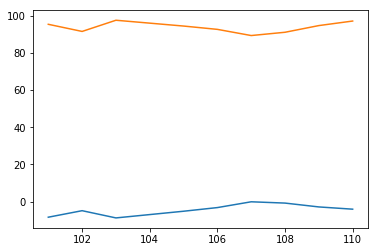

In [13]:
plt.plot(ts, np.hstack(vs).T);

In [14]:
ts, vs = [], []
for t, v in em:
    ts.append(t); vs.append(v.flatten())
    if t == 120: break
ts, vs

([111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0],
 [array([ 3.15875863, 88.28832182]),
  array([ 5.4675392 , 86.04328106]),
  array([ 4.30174361, 88.43100853]),
  array([ 4.74458366, 88.67388845]),
  array([ 2.84867254, 92.03510329]),
  array([ 0.90757264, 95.45656981]),
  array([ 1.29428816, 95.77428245]),
  array([ 7.97612043, 87.6985061 ]),
  array([ 2.15069267, 96.29907644]),
  array([ 0.41533327, 99.4462223 ])])

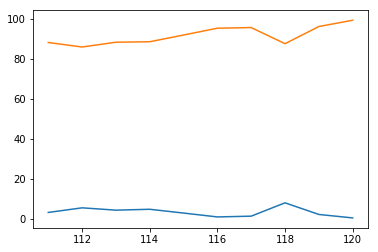

In [15]:
plt.plot(ts, vs);

In [16]:
ts = sim.xtimes(dt.datetime(2017, 5, 1), dt.datetime(2017, 6, 1), dt.timedelta(hours=12))
em = sim.EulerMaruyama(process=W, times=ts, time_unit=dt.timedelta(days=1.), flatten=True)
next(em)

(datetime.datetime(2017, 5, 1, 0, 0), array([0., 0.]))

In [17]:
next(em)

(datetime.datetime(2017, 5, 1, 12, 0), array([-1.55619037,  2.49158715]))

C:\Programs\Win64\Anaconda\V2019.03_Python-3.7\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


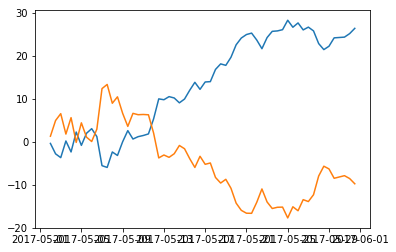

In [18]:
ts, vs = [], []
for t, v in em:
    ts.append(t); vs.append(v)
plt.plot(ts, vs);

In [19]:
X = proc.OrnsteinUhlenbeckProcess(transition=1., vol=1.)

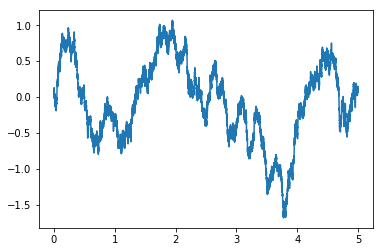

In [20]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=1E-4))
df = sim.run(em)
plt.plot(df);

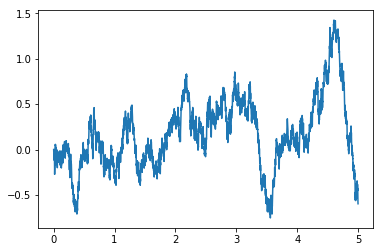

In [21]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=1E-3))
df = sim.run(em)
plt.plot(df);

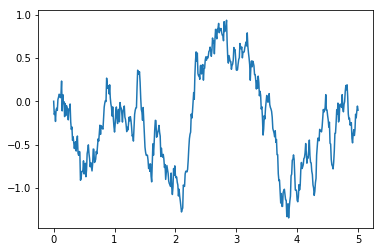

In [22]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=1E-2))
df = sim.run(em)
plt.plot(df);